In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [135]:
train_data_initial = pd.read_csv('flight_delays_train.csv')
test_data_initial = pd.read_csv('flight_delays_test.csv')
test_data_initial['dep_delayed_15min'] = np.NaN

train_data_initial['partition'] = 'train'
test_data_initial['partition'] = 'test'


data = pd.concat([train_data_initial, test_data_initial])

In [136]:
data['DepTime_h'] = data['DepTime']//100
data['DepTime_m'] = data['DepTime']%100
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h,DepTime_m
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,train,19,34
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,train,15,48
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,train,14,22
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,train,10,15
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,train,18,28


In [137]:
data = time_transform(data)

In [138]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h,DepTime_m
0,8,21,7,1934,AA,ATL,DFW,732,N,train,19,34
1,4,20,3,1548,US,PIT,MCO,834,N,train,15,48
2,9,2,5,1422,XE,RDU,CLE,416,N,train,14,22
3,11,25,6,1015,OO,DEN,MEM,872,N,train,10,15
4,10,7,6,1828,WN,MDW,OMA,423,Y,train,18,28


<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

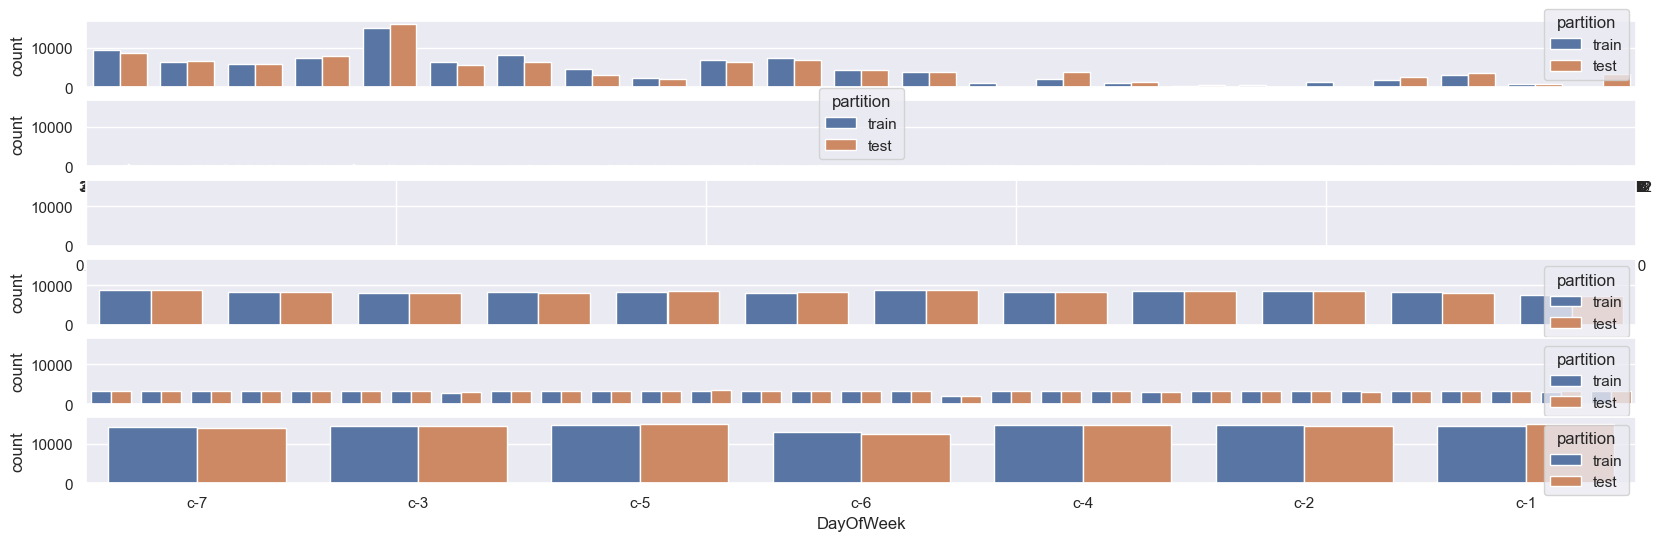

In [127]:
_,axes = plt.subplots(6, 1, sharey=True, figsize=(20, 6))
sns.countplot(x='UniqueCarrier', hue="partition", data=data, ax=axes[0])
sns.countplot(x='Distance', hue="partition", data=data, ax=axes[1])
sns.countplot(x='Month', hue="partition", data=data, ax=axes[3])
sns.countplot(x='DayofMonth', hue="partition", data=data, ax=axes[4])
sns.countplot(x='DayOfWeek', hue="partition", data=data, ax=axes[5])

<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

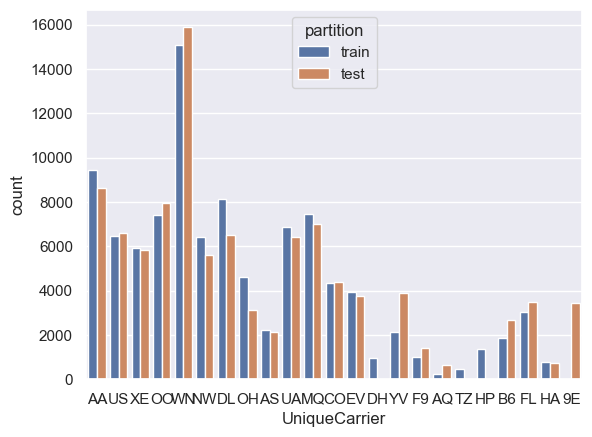

In [128]:
sns.countplot(x='UniqueCarrier', hue="partition", data=data)


In [129]:
data['flight'] = data['Origin']+data['Dest']
pv=data.pivot_table(index=['flight'],columns='partition',values='Month',aggfunc='count')
pv=pv.fillna(0)
pv = pv.reset_index()
pv['ex'] = np.where((pv['test']==0) & (pv['train']!=0),'yes', 'no')
pv
pv[(pv['test']==0) & (pv['train']!=0)]
#pv['train'].sum()/train_data_initial.shape[0]

partition,flight,test,train,ex
6,ABEPHL,0.0,2.0,yes
8,ABIIAH,0.0,1.0,yes
50,ACTIAH,0.0,2.0,yes
55,ACYCVG,0.0,7.0,yes
74,ALBIAD,0.0,12.0,yes
...,...,...,...,...
5013,VCTIAH,0.0,1.0,yes
5014,VISFAT,0.0,1.0,yes
5017,VPSCVG,0.0,5.0,yes
5026,XNACLT,0.0,2.0,yes


In [149]:
data['UniqueCarrier'].unique().shape


(23,)

In [30]:
pd.DataFrame.pivot_table?

<AxesSubplot:xlabel='Month', ylabel='count'>

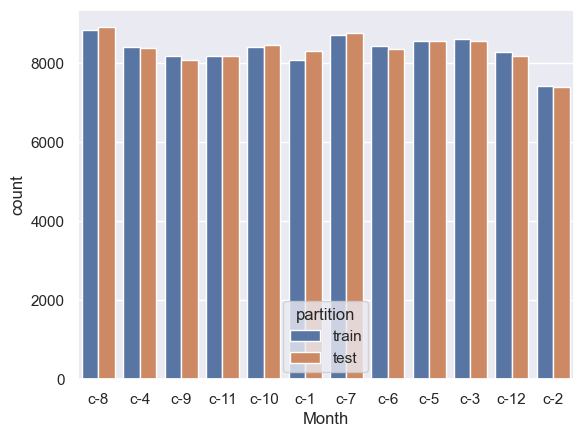

In [27]:
sns.countplot(x='Month', hue="partition", data=data)

<AxesSubplot:xlabel='DayofMonth', ylabel='count'>

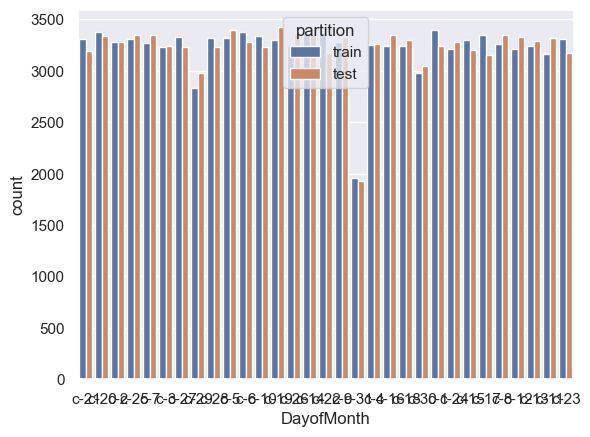

In [28]:
sns.countplot(x='DayofMonth', hue="partition", data=data)

<AxesSubplot:xlabel='Distance', ylabel='count'>

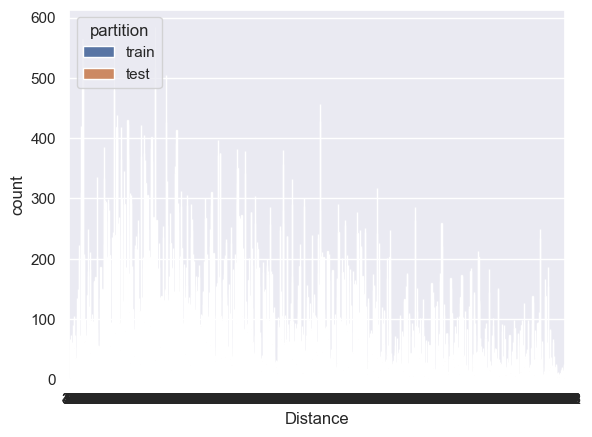

In [84]:
sns.countplot(x='Distance', hue="partition", data=data)

In [131]:
def time_transform(df: pd.DataFrame) -> pd.DataFrame:
    
    time_cols = ['Month', 'DayofMonth', 'DayOfWeek']
    for col in time_cols:
        df[col] = df[col].str[2:].astype('int')
    
    df['DepTime_h'] = df['DepTime'] // 100
#     df['DepTime_m'] = df['DepTime'] % 100
#     df = df.drop(columns=['DepTime'])
    
    return df

In [132]:
data = time_transform(data)

In [7]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h
0,8,21,7,1934,AA,ATL,DFW,732,N,train,19
1,4,20,3,1548,US,PIT,MCO,834,N,train,15
2,9,2,5,1422,XE,RDU,CLE,416,N,train,14
3,11,25,6,1015,OO,DEN,MEM,872,N,train,10
4,10,7,6,1828,WN,MDW,OMA,423,Y,train,18


TypeError: 'AxesSubplot' object is not subscriptable

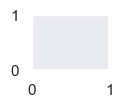

In [30]:
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(6,6,6)
#_,axes = plt.subplots(4, 4, sharey=True, figsize=(20, 6))
sns.histplot(ax=ax[0],x='UniqueCarrier', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)
sns.histplot(ax=ax[1],x='Month', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)
sns.histplot(ax=ax[2],x='DayofMonth', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)
sns.histplot(ax=ax[3],x='DayOfWeek', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)
sns.histplot(ax=ax[4],x='Origin', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)
sns.histplot(ax=ax[5],x='Dest', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="stack", stat="count",kde=False)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Count'>

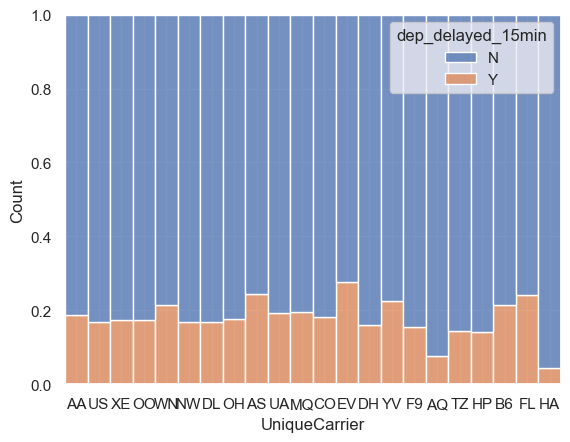

In [34]:
sns.histplot(x='UniqueCarrier', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

<AxesSubplot:xlabel='Month', ylabel='Count'>

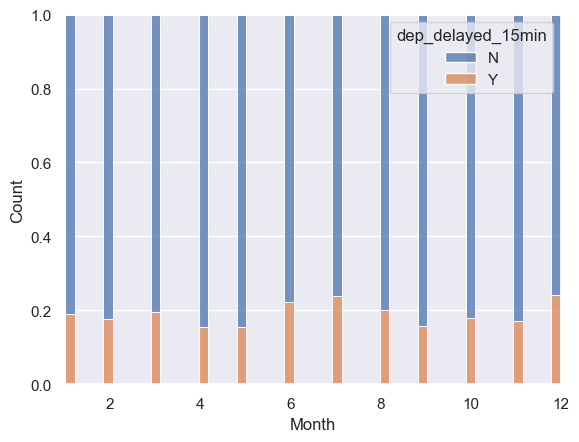

In [33]:
sns.histplot(x='Month', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

<AxesSubplot:xlabel='DayofMonth', ylabel='Count'>

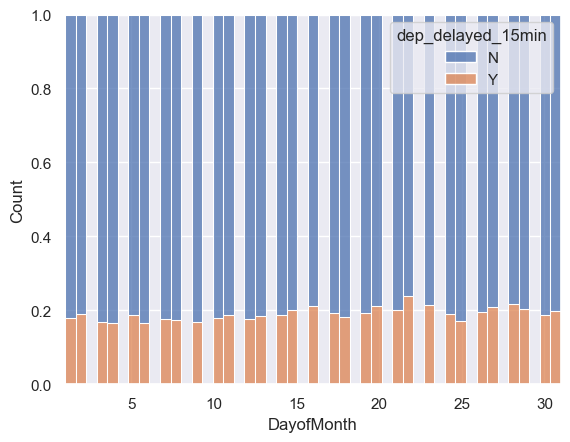

In [36]:
sns.histplot(x='DayofMonth', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

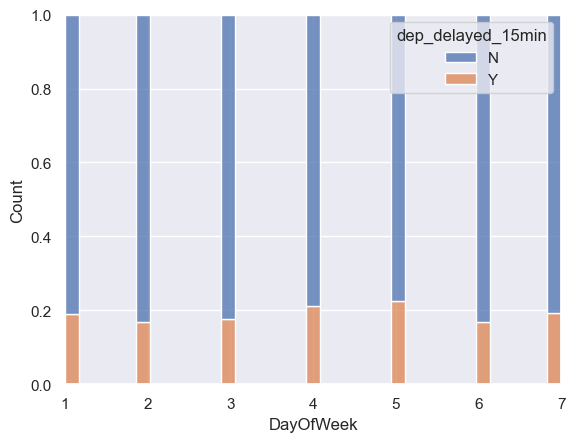

In [37]:
sns.histplot(x='DayOfWeek', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)


<AxesSubplot:xlabel='Origin', ylabel='Count'>

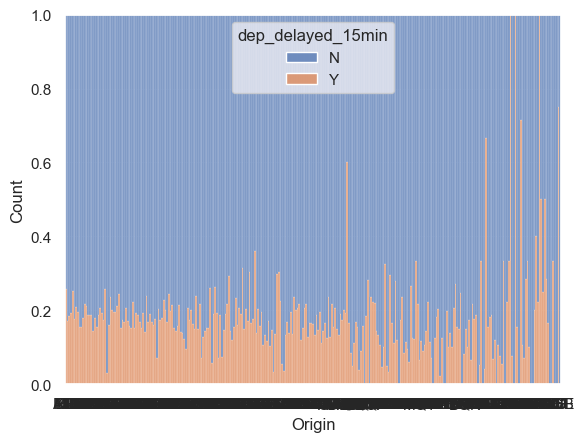

In [38]:
plt.figure(figsize=(30, 12))
sns.histplot(x='Origin', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)


<AxesSubplot:xlabel='Dest', ylabel='Count'>

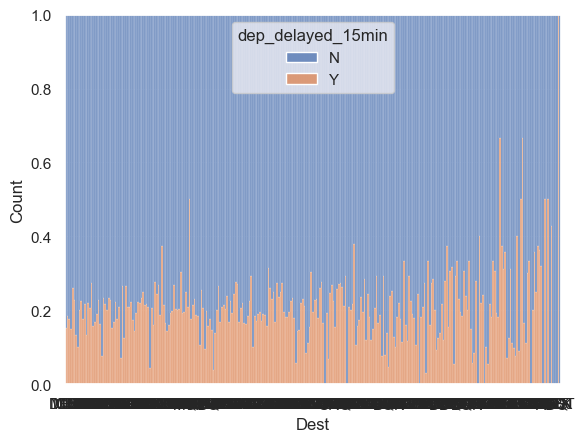

In [39]:
sns.histplot(x='Dest', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

In [40]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h
0,8,21,7,1934,AA,ATL,DFW,732,N,train,19
1,4,20,3,1548,US,PIT,MCO,834,N,train,15
2,9,2,5,1422,XE,RDU,CLE,416,N,train,14
3,11,25,6,1015,OO,DEN,MEM,872,N,train,10
4,10,7,6,1828,WN,MDW,OMA,423,Y,train,18


In [63]:
pv=data[data['dep_delayed_15min']=='Y'].pivot_table(index='Dest', columns='UniqueCarrier', values='dep_delayed_15min', aggfunc='count')

In [64]:
pv.shape

(276, 22)

In [65]:
plt.figure(figsize=(100, 200))
sns.heatmap(pv, fmt=".1f", linewidths=0.5);

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,flight,DepTime_h,DepTime_m
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,train,ATLDFW,19,34
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,train,PITMCO,15,48
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,train,RDUCLE,14,22
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,train,DENMEM,10,15
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,train,MDWOMA,18,28


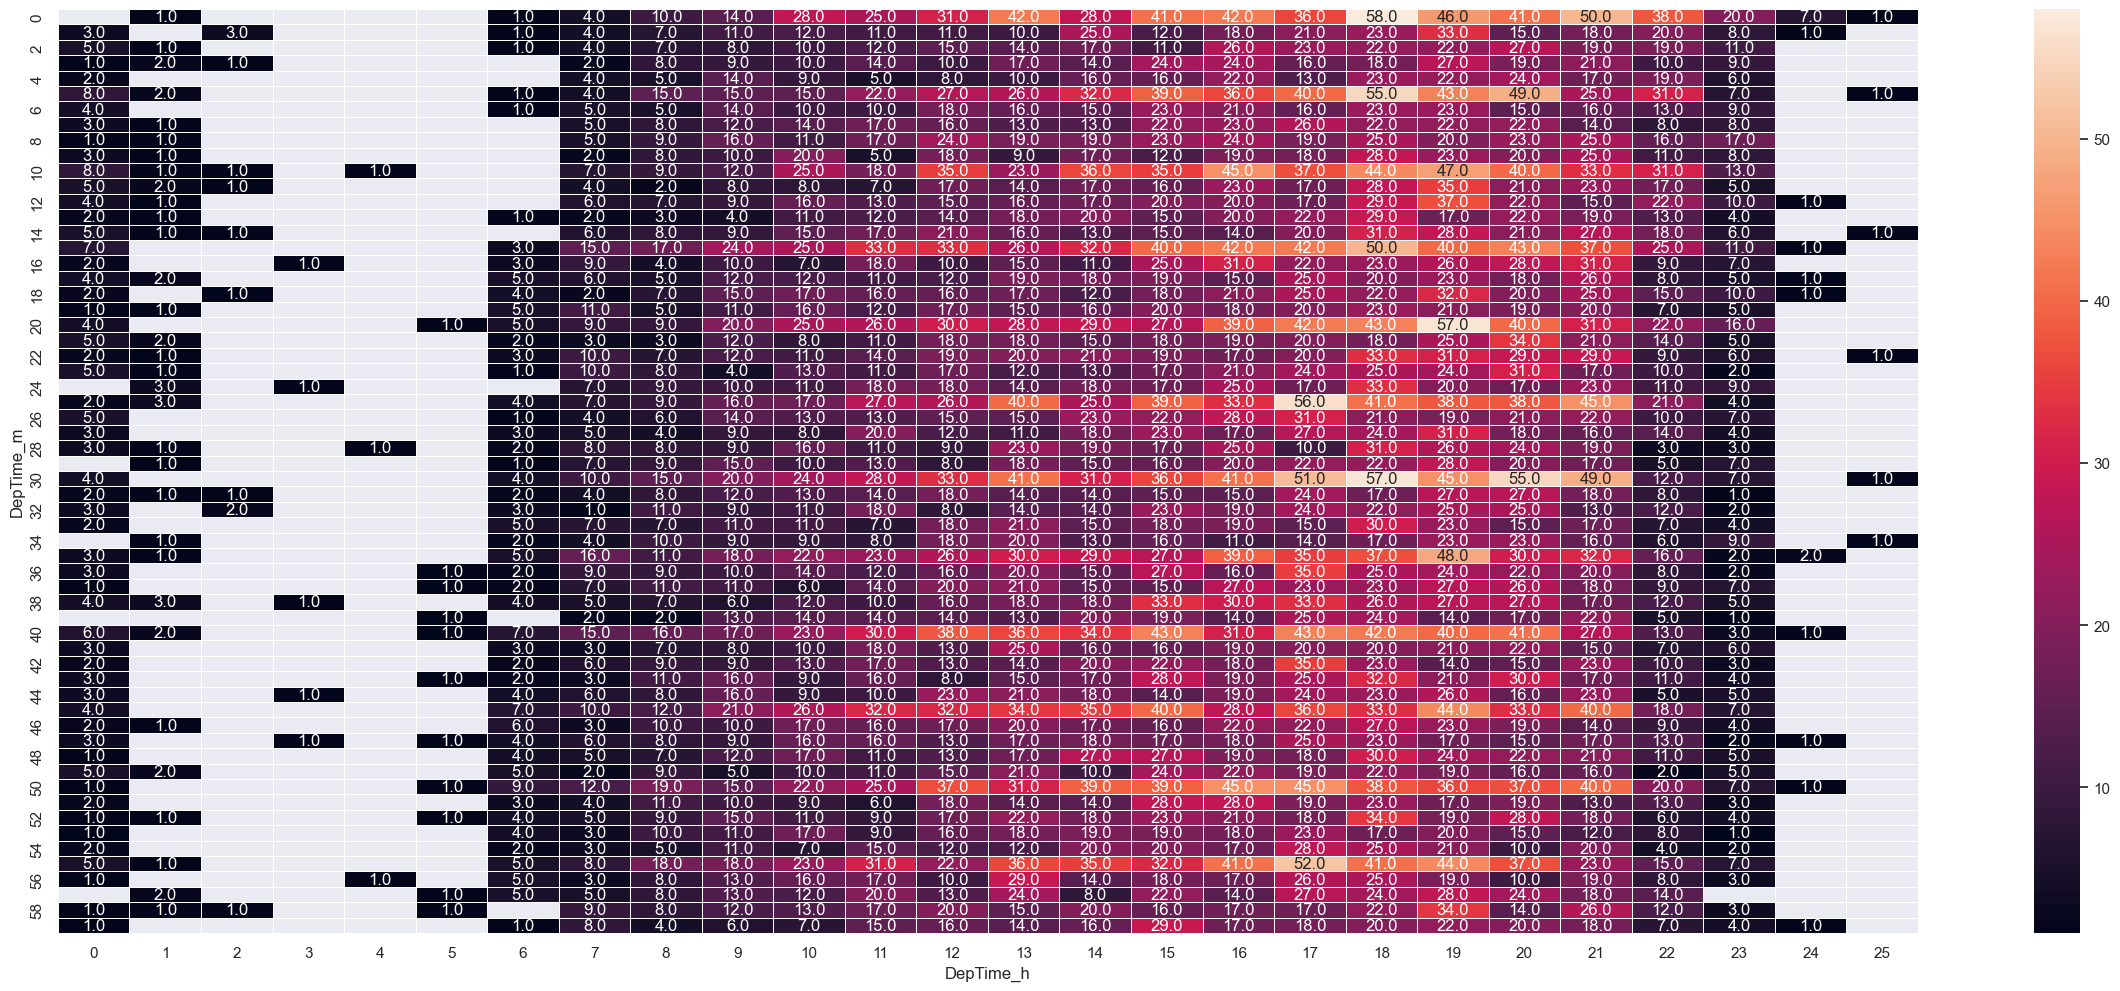

In [73]:
pv=data[data['dep_delayed_15min']=='Y'].pivot_table(
    index='DepTime_m', columns='DepTime_h', values='dep_delayed_15min', aggfunc='count'
)
plt.figure(figsize=(30, 12))
sns.heatmap(pv, fmt=".1f", linewidths=0.5,annot=True);

In [102]:
plt.figure(figsize=(500, 50))
sns.histplot(x='Distance', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

<AxesSubplot:xlabel='Distance', ylabel='Count'>

<AxesSubplot:xlabel='DepTime_h', ylabel='Count'>

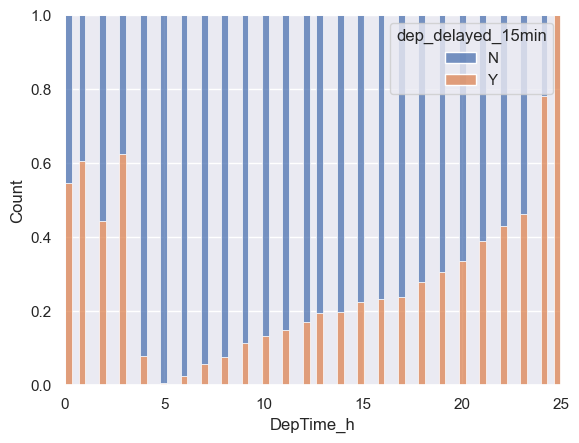

In [91]:
sns.histplot(x='DepTime_h', hue="dep_delayed_15min", data=data[data['partition']=='train'], multiple="fill", stat="count",kde=False)

In [96]:
2^16

18

In [142]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,partition,DepTime_h,DepTime_m
0,8,21,7,1934,AA,ATL,DFW,732,N,train,19,34
1,4,20,3,1548,US,PIT,MCO,834,N,train,15,48
2,9,2,5,1422,XE,RDU,CLE,416,N,train,14,22
3,11,25,6,1015,OO,DEN,MEM,872,N,train,10,15
4,10,7,6,1828,WN,MDW,OMA,423,Y,train,18,28


In [90]:
pv=data.pivot_table(index=['DepTime_m'],columns='partition',values='Month',aggfunc='count')
pv=pv.fillna(0)
pv
# pv = pv.reset_index()
pv['ex'] = np.where((pv['test']==0) & (pv['train']!=0),'yes', 'no')
pv[pv['ex']=='yes']
# pv[(pv['test']==0) & (pv['train']!=0)]
pv[pv['ex']=='yes']['train'].sum()/train_data_initial.shape[0]

0.0

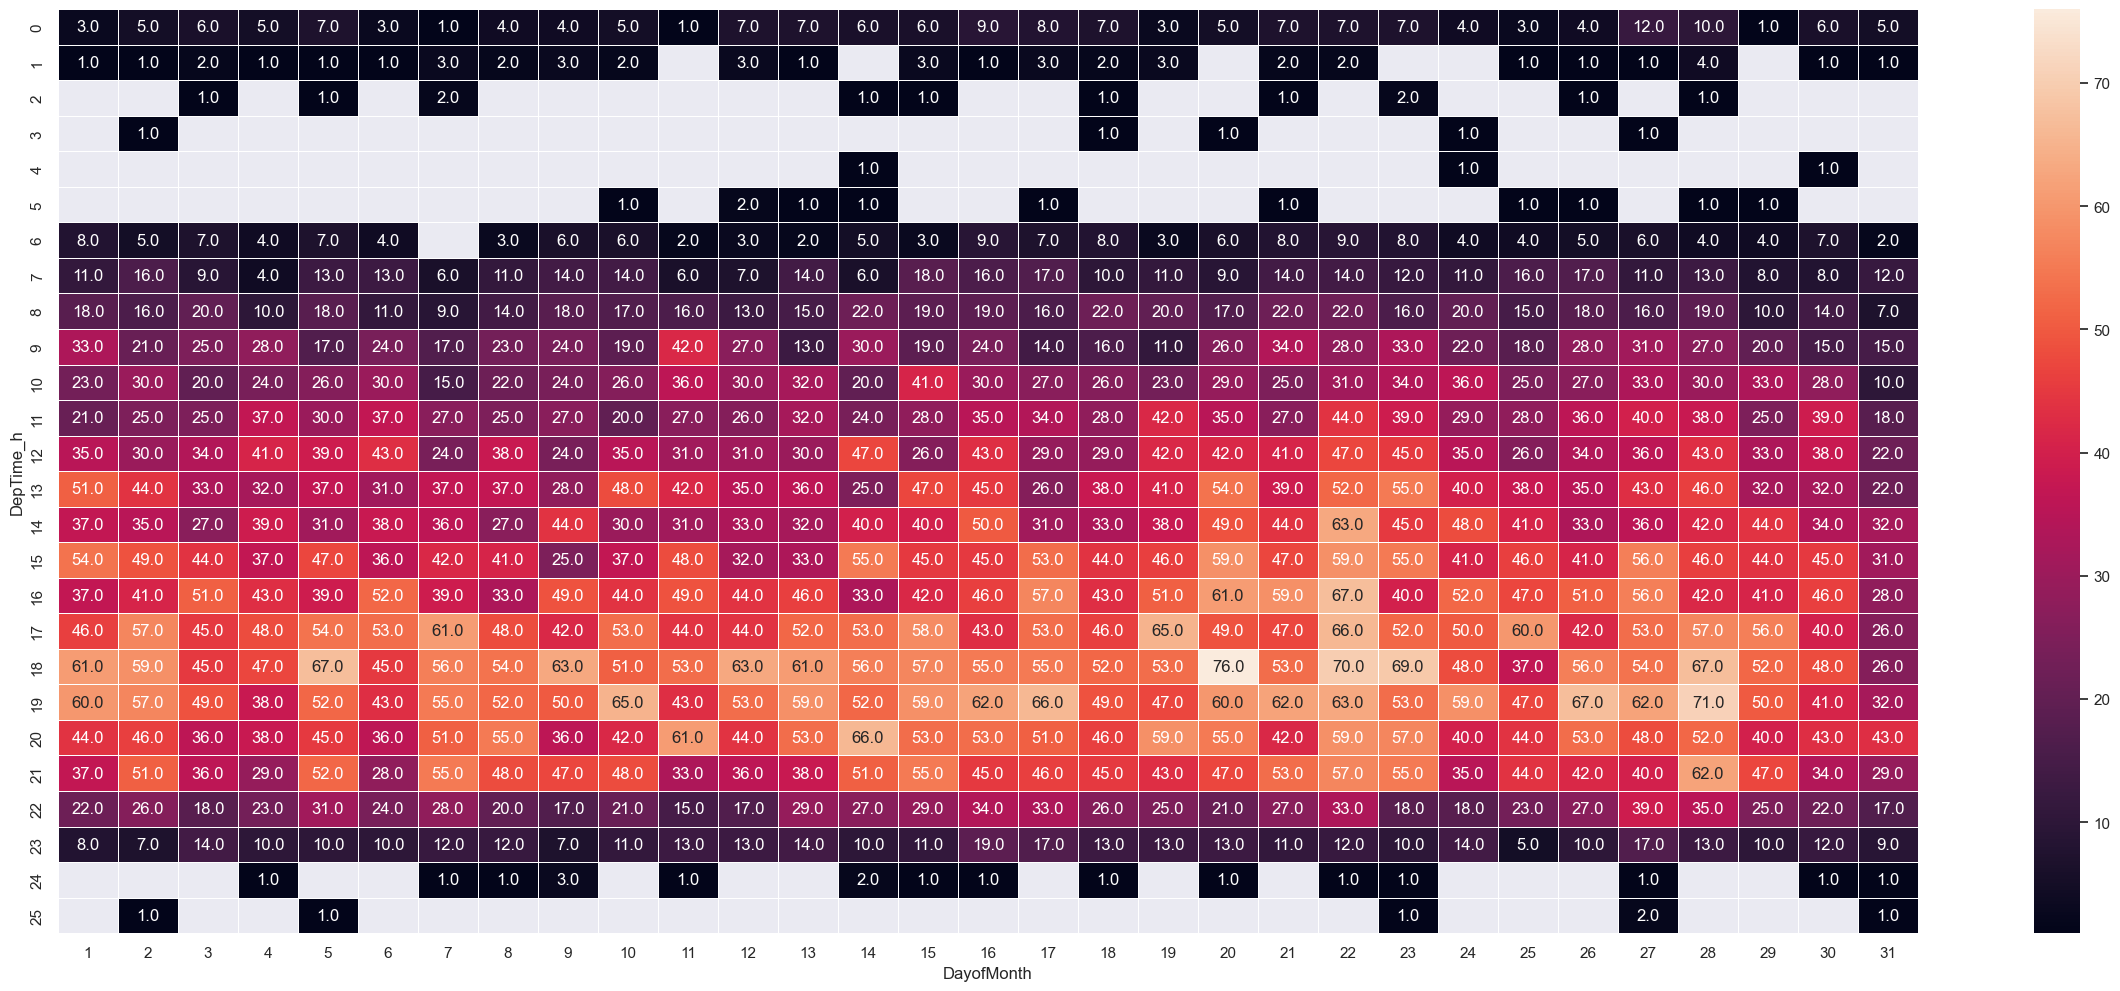

In [148]:
pv=data[data['dep_delayed_15min']=='Y'].pivot_table(
    index='DepTime_h', columns='DayofMonth', values='dep_delayed_15min', aggfunc='count'
)
plt.figure(figsize=(30, 12))
sns.heatmap(pv, fmt=".1f", linewidths=0.5,annot=True);

<AxesSubplot:xlabel='Distance', ylabel='Count'>

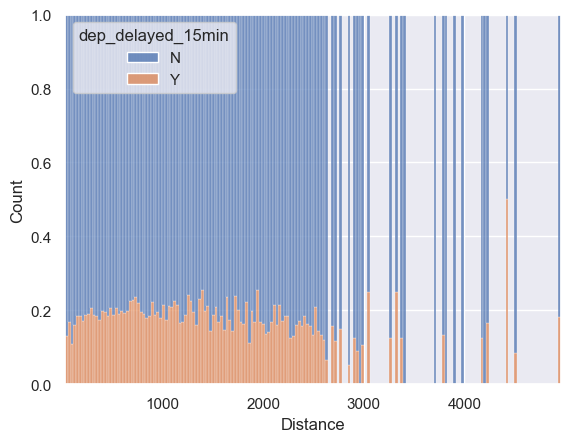

In [118]:
pv=data.pivot_table(index=['Distance'],columns='partition',values='Month',aggfunc='count').sort_index()
pv=pv.reset_index()
pv.head()
#plt.figure(figsize=(500, 50))
sns.histplot(x='Distance', hue="dep_delayed_15min",data=data[(data['partition']=='train')&(data['Distance']!=0)], multiple="fill", stat="count",kde=False)

In [147]:
data[data['dep_delayed_15min']=='Y'].pivot_table(index=['DepTime_h'],columns='DayofMonth',values='Month',aggfunc='count').sort_index()

DayofMonth,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
DepTime_h,,,,,,,,,,,,,,,,,,,,,
0,3.0,5.0,6.0,5.0,7.0,3.0,1.0,4.0,4.0,5.0,...,7.0,7.0,4.0,3.0,4.0,12.0,10.0,1.0,6.0,5.0
1,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,...,2.0,NaN,NaN,1.0,1.0,1.0,4.0,NaN,1.0,1.0
2,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN
6,8.0,5.0,7.0,4.0,7.0,4.0,NaN,3.0,6.0,6.0,...,9.0,8.0,4.0,4.0,5.0,6.0,4.0,4.0,7.0,2.0
7,11.0,16.0,9.0,4.0,13.0,13.0,6.0,11.0,14.0,14.0,...,14.0,12.0,11.0,16.0,17.0,11.0,13.0,8.0,8.0,12.0
8,18.0,16.0,20.0,10.0,18.0,11.0,9.0,14.0,18.0,17.0,...,22.0,16.0,20.0,15.0,18.0,16.0,19.0,10.0,14.0,7.0
